# <font color = 'Purple'>FoodHub Analysis </font>                     
#### <font color = 'Purple'> By- Sulabh Kumar Agarwal</font>

## <font color = 'Purple'>Background</font>

A food-order and supply company call FoodHub has captured data regarding thier operating business which includes:
    - Facilitating customers to order food from resturants
    - Assign a delivery person once the order is accepted by the resturant
    - Delivery person collects and deliver the order to the customer and can get rating as feedback.

## <font color = 'Purple'>Objective</font>

To analyze the given data and find hidden patterns to help FoodHub improve their service and manage demand from different resturants more efficiently leading to higher number of orders served and leading to better custormer satisfaction experience.

## <font color = 'Purple'> Step1: Data Loading and preliminary analysis </font>

In [1]:
## Import libraries and Load the data 

# Below Package is to suppress any warnings that we get while executing the packages.
import warnings
warnings.filterwarnings("ignore")

# import required packages for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# to enable plots displayed inline within the notebook, rather than in a separate window or output cell
%matplotlib inline

df = pd.read_csv('foodhub_order.csv')

In [3]:
# Observe first few records to check if data is loaded correctly

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


<b><font color = 'green'>Observation:</font></b> 
- Data is loaded correctly, with first row as dataframe header. In some cases we have to define use first column as header if it does not take it automatically.

In [7]:
# Check the shape, Datatype and general info about the loaded data

print("Shape: ", df.shape)
print("\ndataTypes")
print(df.dtypes)
# print(df.info)

Shape:  (1898, 9)

dataTypes
order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


<b><font color = 'green'>Observation:</font></b> 
- Total there are 1898 Records in the dataset and 9 columns
- Among 9 columns:
    - Order_Id & Customer_Id are of type Int (Non additive attributes)
    - food_preparation_time and delivery_time are of type Int (additive attributes)
    - restaurant_name, cuisine_type, day_of_the_week & rating are of type object (Categorical attributes)
    - cost_of_the_order is of type float (additive attribute)

In [9]:
# Check for null values

df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

<b><font color = 'green'>Observation:</font></b> 
- There are no Null values in the given dataset, hence no treatment required for missing values.

In [11]:
# Check for the statistical data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


## <font color = 'Purple'>Step2: Univariate Analysis</font>

In [13]:
# check for the distinct values in the categorical columns
df.select_dtypes(include='object').nunique()


restaurant_name    178
cuisine_type        14
day_of_the_week      2
rating               4
dtype: int64

In [15]:
# How many resturants offer more than one cuisine

temp = df.groupby('restaurant_name')['cuisine_type'].nunique().rename('Count')
temp = temp.reset_index()
temp[temp.Count>1].sort_values(by='Count')

,restaurant_name,Count
153,The Meatball Shop,2


<b><font color = 'green'>Observation:</font></b> 

The Meatball Shop is the only resturant in the dataset that offer multiple cuisine. 

In [17]:
# Find out which resturants are more popular among the customers

df2 = df.groupby('restaurant_name')['order_id'].agg(Count='count').sort_values(by='Count',ascending=False)

df2['perc'] = 100*df2['Count']/df2['Count'].sum()
# print(df2)

## print Top 10 Resturants
print("% of Orders by top 10 Restaurants: ", df2[0:10].perc.sum())
print("\n\nTop 10 Restaurants:")
print(df2[0:10])

% of Orders by top 10 Restaurants:  46.73340358271866


Top 10 Restaurants:
                               Count       perc
restaurant_name                                
Shake Shack                      219  11.538462
The Meatball Shop                132   6.954689
Blue Ribbon Sushi                119   6.269758
Blue Ribbon Fried Chicken         96   5.057956
Parm                              68   3.582719
RedFarm Broadway                  59   3.108535
RedFarm Hudson                    55   2.897787
TAO                               49   2.581665
Han Dynasty                       46   2.423604
Blue Ribbon Sushi Bar & Grill     44   2.318230


<b><font color='green'>Observation</font></b>

- Top 10 resturants out of 178 resturants make up for 46.7 % of total orders
- Top 3 resturants by number of orders are Shake Shack, The Meatball Shop & Blue Ribbon Sushi


In [35]:
# How many customer are repeat customers

df_cust = df.groupby('customer_id')['order_id'].agg(Count='count').sort_values(by='Count',ascending=False).reset_index()
print("Total Unique Customers:", df['customer_id'].nunique())
print("\nTotal Repeat Customere:", df_cust[df_cust.Count>1].count()) ## why is there a count in output??
print("\nPercentage:", 100*df_cust[df_cust.Count>1].count()/df['customer_id'].nunique())

Total Unique Customers: 1200

Total Repeat Customere: customer_id    416
Count          416
dtype: int64

Percentage: customer_id    34.666667
Count          34.666667
dtype: float64


<b><font color='green'>Observation</font></b>

- Only 34.67% customers have placed repeat order with FoodHub.
- This indicates FoodHub need to work on getting customers back via offering deals, discounts etc.

In [37]:
# lets analyze Cuisine Type

df3 = df.groupby('cuisine_type')['order_id'].agg(Count='count').sort_values(by='Count', ascending=False)
df3

,Count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


<b><font color='green'>Observation</font></b>

- Top 4 Cuisine Type making most of the orders are - American, Japanese, Italian, Chinese

In [39]:
# Analyze Ratings
print(df['rating'].value_counts())
df['rating'] = df['rating'].replace('Not given', np.nan)


rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


<b><font color = 'green'>Observation:</font></b>

- Out of 1898 orders, 736 orders does not have any rating

<Axes: >

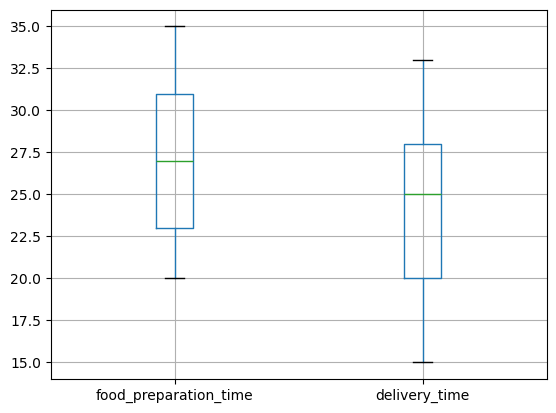

In [41]:
# Analyze Food Preparation time and Delivery time.
df[['food_preparation_time','delivery_time']].boxplot()

<b><font color = 'green'>Observation:</font></b>

- Average food preparation time is ~27 min, max is 35 min & min is 20 min
- Average delivery time is 25 min, max is ~33 min and min is 15 mins.
- FoodHub shall see how to reduce average delivery time.

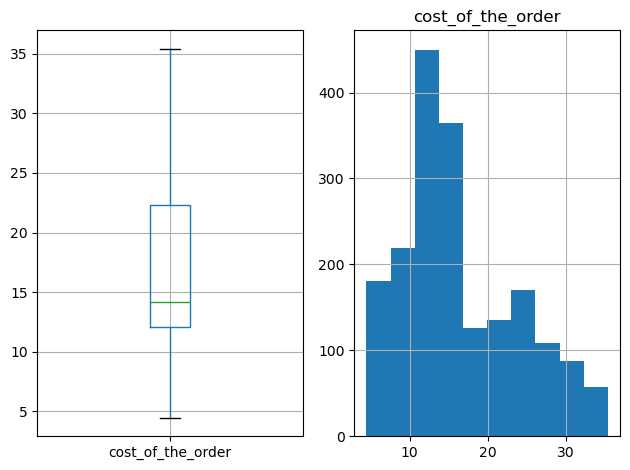

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df[['cost_of_the_order']].boxplot(ax=axes[0])
df[['cost_of_the_order']].hist(ax=axes[1])
plt.tight_layout()

<b><font color='green'>Observation:</font></b>
- The average cost of order is approx. 14, max is approx. 35.5, min is approx. 4.5
- Which means there is high variance in the cost range
- The hist plot suggests Right skewness in the values with a second peak at around 25.

In [46]:
# Analyze Day_of_the_week, count of order and average delivery time

print("% of Orders:")
print(100*df.groupby('day_of_the_week')['order_id'].count()/df['order_id'].count())
print("\nAverage Delivery time")
print(df.groupby('day_of_the_week')['delivery_time'].mean())

% of Orders:
day_of_the_week
Weekday    28.81981
Weekend    71.18019
Name: order_id, dtype: float64

Average Delivery time
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


<b><font color='green'>Observation:</font></b>
- The order are approx 42% higher on weekend as compared to weekday.
- FoodHub can offer packages and discount on weekdays, to increase number of orders.
- The average delivery time is higher on weekdays as compared to Weekend even though there is reverse trend in number of orders. FoodHub must invistigate if this is due to traffic conditions or any other issue.

## <font color = 'Purple'>Step3: Multivariate Analysis</font>

In [48]:
df['rating']=pd.to_numeric(df['rating'], errors='coerce')

In [50]:
# print(df.dtypes)
# Let's summarize the data

df5 = df.groupby(['cuisine_type','day_of_the_week']).agg({'order_id':'count', 'cost_of_the_order':'sum', 'rating':'mean', \
                                                                           'food_preparation_time':'mean', 'delivery_time':'mean'})
(df5.head(20))
# print(df5.shape)
df5 = df5.reset_index()
# df5.rename({"order_id":"order_count"}, inplace=True) ## not working
df5.head()

,cuisine_type,day_of_the_week,order_id,cost_of_the_order,rating,food_preparation_time,delivery_time
0,American,Weekday,169,2587.11,4.252252,27.408284,28.248521
1,American,Weekend,415,6943.67,4.319066,27.453012,22.542169
2,Chinese,Weekday,52,891.68,4.230769,28.076923,28.826923
3,Chinese,Weekend,163,2613.94,4.364486,27.331288,22.269939
4,French,Weekday,5,104.33,4.500000,27.200000,27.200000


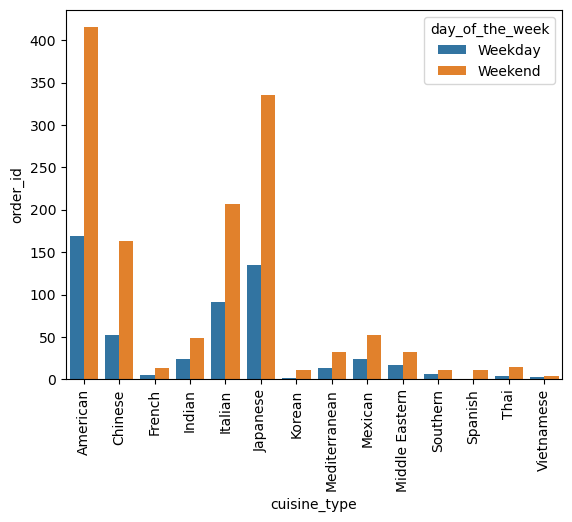

In [52]:
# Lets observe if there is any diff in number of orders placed on weekdays over weekends
sns.barplot(data=df5, x="cuisine_type", y="order_id", hue="day_of_the_week")
plt.xticks(rotation=90)
plt.show()

<b><font color='green'>Observation</font></b>

- Top 4 types of Cuisine ordered by customers on weekday and weekend are - America, Japanese, Italian, Chinese
- Among these top cuisines, orders increase by 50% or more over the weekend as compared to weekdays.

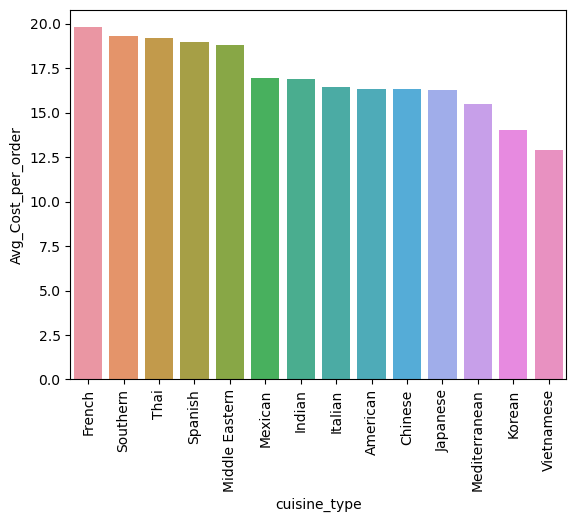

In [54]:
# Find out which cuisines are more costlier 
df6 = df.groupby(['cuisine_type']).agg({'order_id':'count', 'cost_of_the_order':'sum', 'rating':'mean', \
                                                                           'food_preparation_time':'mean', 'delivery_time':'mean'})
df6 = df6.reset_index()
df6['Avg_Cost_per_order'] = df6['cost_of_the_order']/df6['order_id']
sns.barplot(data=df6, x="cuisine_type", y="Avg_Cost_per_order" \
            ,order = df6.sort_values(by='Avg_Cost_per_order', ascending=False).set_index('cuisine_type').index)
plt.xticks(rotation=90)
plt.show()

<b><font color='green'>Observation</font></b>

- French Cuisine need most costlier as compared to top ordered cuisines like America, Japanese, Italian & Chinese.

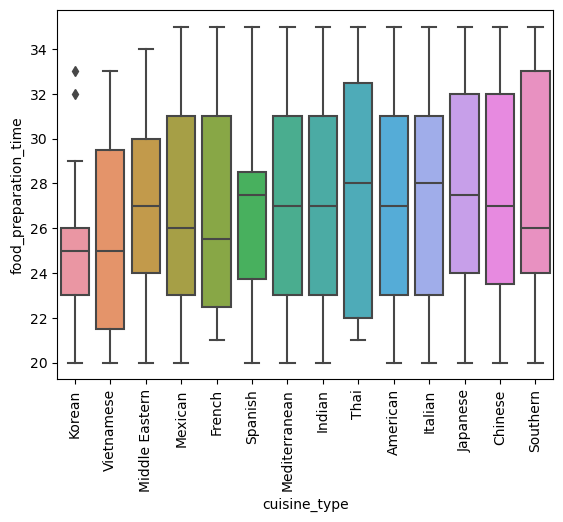

In [56]:
# Find out cuisine and their preparation time

sns.boxplot(data=df, x = 'cuisine_type', y='food_preparation_time', \
            order = df.groupby('cuisine_type')['food_preparation_time'].mean().sort_values().index)
plt.xticks(rotation=90)
plt.show()


<b><font color='green'>Observation</font></b>

- Korean cuisine seems to take least time to prepare with few outliers though. And Southern cuisine seems more time taking.  

In [58]:
# Is there any relationship between Low Ratings and Non Repeative customers

df_cust_1 = df.groupby('customer_id').agg({'rating':'mean', 'order_id':'count'}).reset_index()
df_cust_1['rating'] = df_cust_1['rating'].fillna(0)
df_cust_1['Repeat_Cust'] = ['Y' if x >1 else 'N' for x in df_cust_1['order_id']]  ## List Compehension
df_cust_1.head(5)


,customer_id,rating,order_id,Repeat_Cust
0,1311,0.0,1,N
1,5139,5.0,1,N
2,5444,3.0,1,N
3,5693,0.0,1,N
4,6987,4.0,2,Y


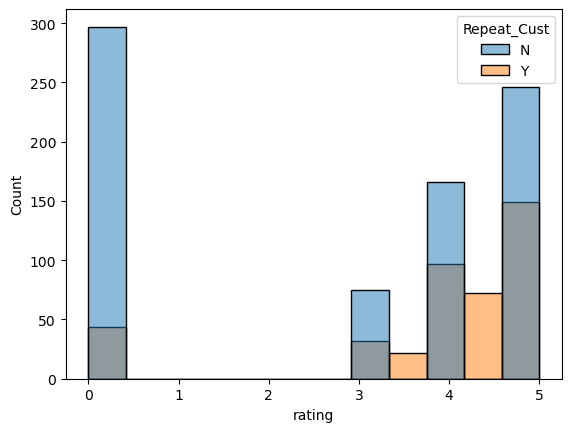

In [60]:
# sns.scatterplot(data=df_cust_1, x='order_id', y='rating')
sns.histplot(data=df_cust_1, x = 'rating', hue = 'Repeat_Cust', legend = True )
plt.show()

<b><font color='green'>Observation</font></b>

- Approx 300 customers ordered only once and didn't submit any ratings. This could be because they are not happy with the service.
- Approx 250 Customers ordered only once but they rated 5, means they were happy with the service, but may be they are getting better offer on other apps, hence didn't retured to FoodHub.

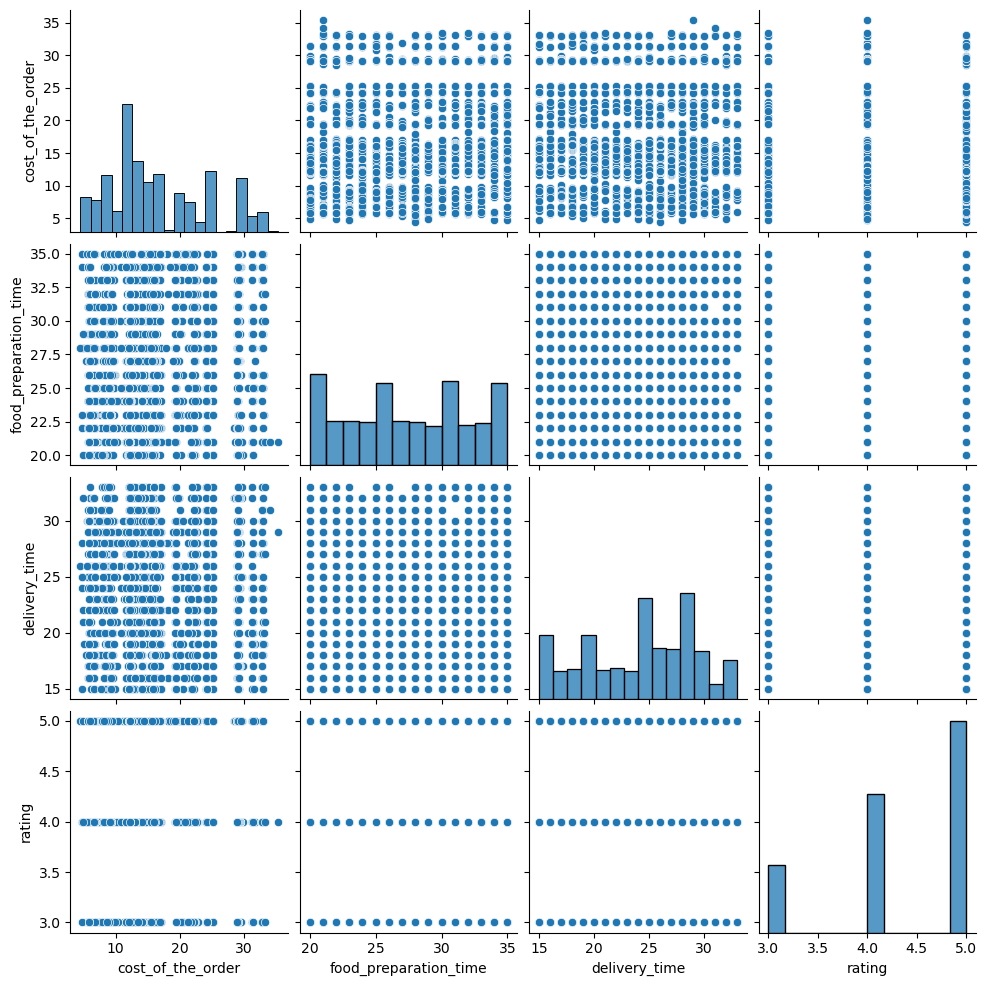

In [62]:
# check if there is any relationship between int type columns

sns.pairplot(data = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating']])

<b><font color='green'>Observation</font></b>

- While there seems no linear relationship between these attributes, one trend observed is for the customers who have rated, the orders are rated 5 more than other rating codes.

## <font color = 'Purple'>Step4: Conclusion</font>


#### <b>Dataset Observation</b>

- No Missing values in Dataset.
- Total there are 1898 Records in the dataset and 9 columns
- Among 9 columns:
    - Order_Id & Customer_Id are of type Int (*Non additive attributes*)
    - food_preparation_time and delivery_time are of type Int (*Additive attributes*)
    - restaurant_name, cuisine_type, day_of_the_week & rating are of type object (*Categorical attributes*)
    - cost_of_the_order is of type float (*Additive attribute*)
 
#### <b>Univariate Analysis Observation</b>
- The **Meatball Shop** is the only resturant in the dataset that offer multiple cuisine.
- **Top 10 resturants** out of 178 resturants **make up for 46.7%** of total orders
- **Top 3 resturants** by number of orders are **Shake Shack, The Meatball Shop & Blue Ribbon Sushi.**
- Only **34.67% customers** have placed repeat order with FoodHub. *This indicates FoodHub need to work on getting customers back via offering deals, discounts etc.*
- **Top 4 Cuisine Type** making most of the orders are - *American, Japanese, Italian, Chinese*
- Out of 1898 orders, **736 orders** *does not have any rating*
- For food preparation time **average** is ~27 min, **max** is 35 min & **min** is 20 min.
- For delivery time **average** is 25 mmin,** ma**x is ~33 min and** mi**n is 15 mins *
FoodHub shall see how to reduce average delivery tim*
- **The average delivery time is higher on weekdays as compared to Weekend** even though there is reverse trend in number of orders. FoodHub must invistigate if this is due to traffic conditions or any other issue.
- The order are approx **42% higher on weekend** as compared to weekday. *
FoodHub can offer packages and discount on weekdays, to increase number of orders*


#### <b>Multivariate Analysis Observation</b>
- **Top 4 trending Cuisine** ordered by customers on **weekday and weekend** are - *America, Japanese, Italian & Chinese*
- Among these top cuisines, **orders increase by 50% or more over the weekend as compared to weekdays**.
- **French Cuisine** is most costlier as compared to top ordered cuisines like America, Japanese, Italian & Chinese.
- **Korean cuisine** seems to take least time to prepare with few outliers though. And **Southern cuisine** seems more time taking.
- While there seems *no linear relationship* between these attributes, one trend observed is for the customers who have rated, the number of orders rated as 5 are more than other rating codes.
- Approx **300 customers ordered only once** and didn't submit any ratings. This could be because they are not happy with the service.
- Approx **250 Customers ordered only once but they rated 5**, means they were happy with the service, but may be they are getting better offer on other apps, hence didn't retured to FoodHub.

#### <B>Recommendation</B>
- FoodHub must look into customers who didn't repeat orders. Is that due to any bad experience like delay in delivery or Food quality.
- Try to attract more custormers via discount vouchers on bulk orders or other feasible deals. This can help increase orders on Weekdays as well.
- Try to bring down food delivery time overall and specially on weekdays.
- For customers with repeat orders, look if FoodHub can advertise 'Today's special' from resturants based on their favourite cuisines orders in past.
- Based on Top 10 Resturants getting more orders, pre-manage service from these resturants more actively reducing delivery time.
- Offer discounts on cuisines less popular to increase customer interest in these cuisines.
- Check on ~250 customers that rated 5 but only ordered once, if they are getting better deals with competitors.e.e.bute)